## MA-IRL 
- nonlinear case
- asynchronous update



* found error in control 
* see commit 33a04a38aa8be33b06210d28e714cbb5c75ab293

In [1]:
using PyPlot
using JLD2, FileIO
using StatsBase, LinearAlgebra

#### initial simulation 

- decreasing schedule too slow 
- 20 samples per update

In [2]:
@load "../data/2020-07-12T23:41:19.044.jld2"  data     # normalized feature

1-element Array{Symbol,1}:
 :data

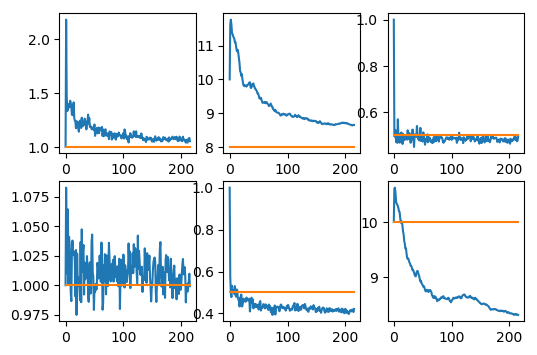

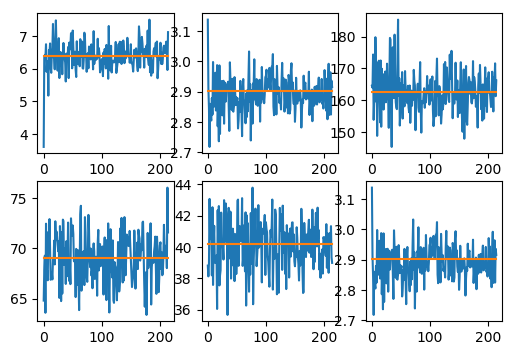

In [3]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 3
figsize=(6,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 3 
figsize=(6,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [4]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:end]' * data["true theta"][4:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", data["feature_counts_demonstration"][4:end])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:end])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-20:end,:], dims=1)
println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:end])
theta_avg = mean(data["theta_est"][end-20:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:end])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:end]' * theta_avg[4:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [6.37982, 69.0024, 2.90137] [40.2206, 162.496, 2.90137]
 true theta [1.0, 1.0, 8.0] [0.5, 0.5, 10.0]
 this is demonstrated cost: player 1- 98.59310984048078 and player 2- 130.3718253596672
 ----- estimation ---- 
 est feature counts [6.43889, 69.439, 2.89409] [39.8773, 163.63, 2.89409]
 estimated  theta [1.06604, 1.00435, 8.68042][0.411079, 0.480794, 8.33321]
 this is estimated cost: player 1- 101.72674197367016 and player 2- 119.18225914122593


### Changed simulation
commit: f69d2e1b6936be6bf443f839c9e63bc908d881cc
- more rapid decreasing learning rate
- more samples for each update (50)
- random initialization, maybe should try initialize further from true value 

In [6]:
# @load "../data/2020-07-14T23:39:30.208.jld2"  data       
@load "../data/2020-07-15T15:03:25.838.jld2"  data     # better performance

1-element Array{Symbol,1}:
 :data

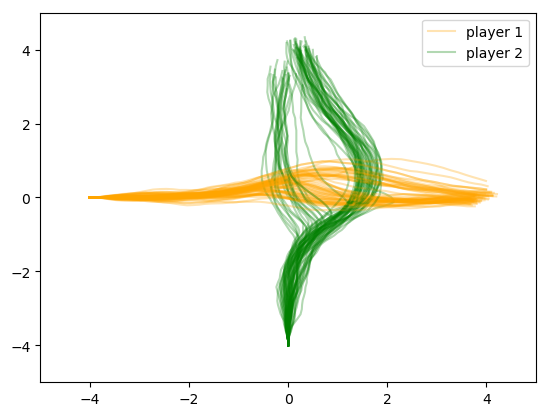

PyObject <matplotlib.legend.Legend object at 0x7f053c3f0b90>

In [7]:
demos = reshape(vcat(data["demonstration_xtrajectory"]...), (61, 200, 8))
fig, ax = subplots(1,1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
for i = 1:size(demos)[1]
    ax.plot(demos[:,i,1], demos[:,i,2], color="orange", alpha=0.3)
    ax.plot(demos[:,i,5], demos[:,i,6], color="green", alpha=0.3)
end
ax.plot(demos[:,1,1], demos[:,1,2], color="orange", alpha=0.3, label="player 1")
ax.plot(demos[:,1,5], demos[:,1,6], color="green", alpha=0.3,  label="player 2")
ax.legend()

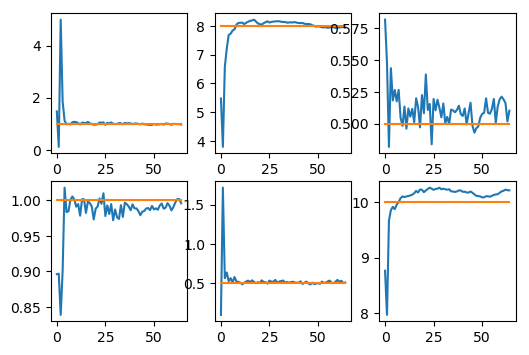

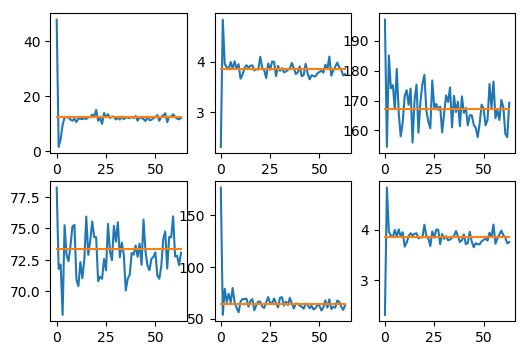

In [8]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 3
figsize=(6,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 3 
figsize=(6,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [9]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:end]' * data["true theta"][4:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", data["feature_counts_demonstration"][4:end])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:end])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-20:end,:], dims=1)
println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:end])
theta_avg = mean(data["theta_est"][end-20:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:end])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:end]' * theta_avg[4:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [12.2093, 73.3581, 3.86176] [64.1612, 167.321, 3.86176]
 true theta [1.0, 1.0, 8.0] [0.5, 0.5, 10.0]
 this is demonstrated cost: player 1- 116.46148697121922 and player 2- 154.35878316841482
 ----- estimation ---- 
 est feature counts [12.057, 73.0185, 3.81993] [62.4311, 165.331, 3.81993]
 estimated  theta [0.984148, 0.991279, 7.97749][0.509848, 0.509136, 10.1388]
 this is estimated cost: player 1- 114.72101975121483 and player 2- 154.7355386952995


### Changed simulation
commit: 6b2f99581efc4e12ae3c227e10ae3490f391f949
- a better random initialization, avoid initializing too close


In [7]:
@load "../data/2020-07-16T20:22:06.598.jld2"  data    

1-element Array{Symbol,1}:
 :data

In [8]:
data

Dict{Any,Any} with 7 entries:
  "demonstration_utrajectory"    => Any[[-0.454165 0.293088 0.0342044 1.69055; …
  "theta_est"                    => [0.556054 0.573209 … 0.211555 14.9967; 0.86…
  "demonstration_xtrajectory"    => Any[[-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1…
  "feature_counts_proposed"      => [17.3427 77.8095 … 169.464 3.4476; 13.0927 …
  "x_reference"                  => [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.33 …
  "feature_counts_demonstration" => [12.2124, 73.7514, 3.92575, 67.764, 171.08,…
  "true theta"                   => [1.0, 1.0, 8.0, 0.5, 0.5, 10.0]

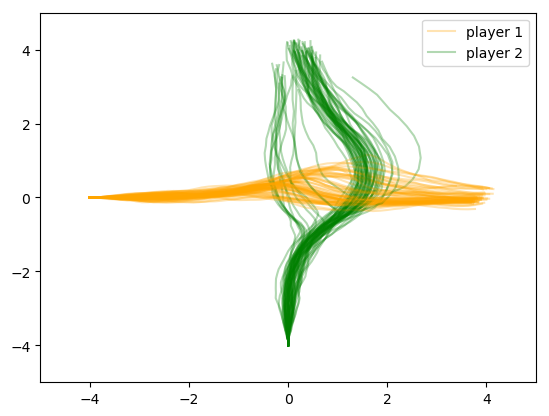

PyObject <matplotlib.legend.Legend object at 0x7f12944db8d0>

In [9]:
demos = reshape(vcat(data["demonstration_xtrajectory"]...), (61, 200, 8))
fig, ax = subplots(1,1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
for i = 1:size(demos)[1]
    ax.plot(demos[:,i,1], demos[:,i,2], color="orange", alpha=0.3)
    ax.plot(demos[:,i,5], demos[:,i,6], color="green", alpha=0.3)
end
ax.plot(demos[:,1,1], demos[:,1,2], color="orange", alpha=0.3, label="player 1")
ax.plot(demos[:,1,5], demos[:,1,6], color="green", alpha=0.3,  label="player 2")
ax.legend()

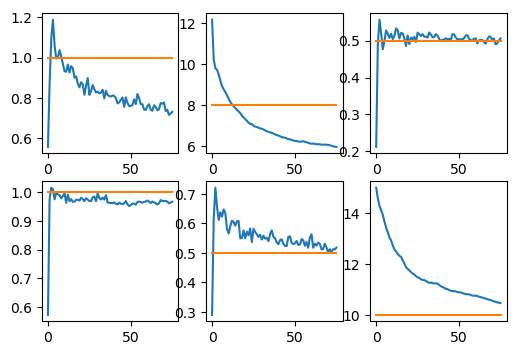

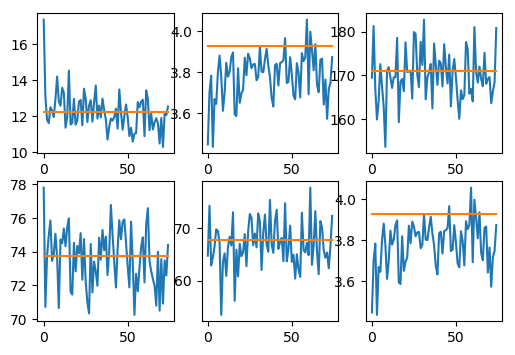

In [10]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 3
figsize=(6,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 3 
figsize=(6,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [11]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:end]' * data["true theta"][4:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", data["feature_counts_demonstration"][4:end])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:end])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-20:end,:], dims=1)
println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:end])
theta_avg = mean(data["theta_est"][end-20:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:end])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:end]' * theta_avg[4:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [12.2124, 73.7514, 3.92575] [67.764, 171.08, 3.92575]
 true theta [1.0, 1.0, 8.0] [0.5, 0.5, 10.0]
 this is demonstrated cost: player 1- 117.3698052641592 and player 2- 158.6794411525248
 ----- estimation ---- 
 est feature counts [11.8698, 72.9474, 3.80842] [66.9119, 170.007, 3.80842]
 estimated  theta [0.751592, 0.965441, 6.09707][0.524526, 0.502147, 10.6498]
 this is estimated cost: player 1- 102.56789563766472 and player 2- 161.02451059899906


#### fixed a bug 
fixed a bug 33a04a38aa8be33b06210d28e714cbb5c75ab293

In [7]:
# @load "../data/2020-07-17T16:39:52.049.jld2"  data 
@load "../data/2020-07-19T10:20:44.06.jld2"  data   

1-element Array{Symbol,1}:
 :data

In [19]:
demos = reshape(vcat(data["demonstration_xtrajectory"]...), (61, 200, 8));

##### on behavior level, the percentage of player 1 passing ahead of player 2

In [28]:
include("../utils.jl")

demo_pass = []
for n = 1:size(demos)[2]
    push!(demo_pass, pass_behavior(demos[:,n,:]))
end
player1pass = count(x->x==1, demo_pass)/length(demo_pass)

0.34

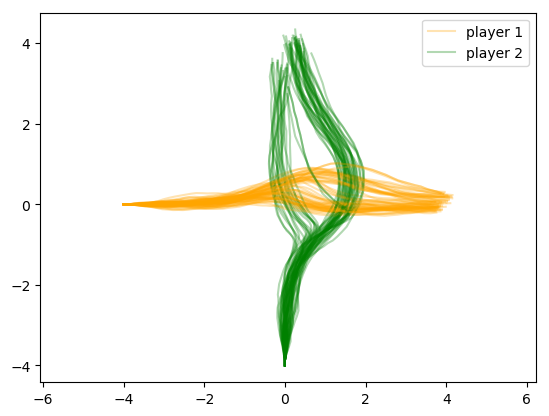

PyObject <matplotlib.legend.Legend object at 0x7f8a54052210>

In [34]:

fig, ax = subplots(1,1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis("equaL")
for i = 1:size(demos)[1]
    ax.plot(demos[:,i,1], demos[:,i,2], color="orange", alpha=0.3)
    ax.plot(demos[:,i,5], demos[:,i,6], color="green", alpha=0.3)
end
ax.plot(demos[:,1,1], demos[:,1,2], color="orange", alpha=0.3, label="player 1")
ax.plot(demos[:,1,5], demos[:,1,6], color="green", alpha=0.3,  label="player 2")
ax.legend()

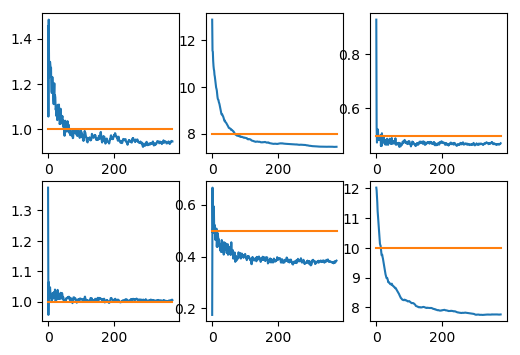

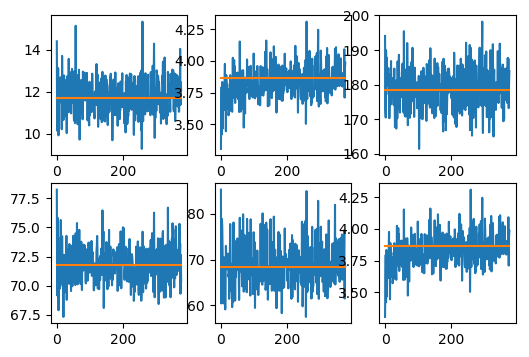

In [8]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 3
figsize=(6,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 3 
figsize=(6,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [21]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:end]' * data["true theta"][4:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", data["feature_counts_demonstration"][4:end])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:end])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-20:end,:], dims=1)
println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:end])
theta_avg = mean(data["theta_est"][end-20:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:end])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:end]' * theta_avg[4:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [11.6998, 71.804, 3.86194] [68.4036, 178.458, 3.86194]
 true theta [1.0, 1.0, 8.0] [0.5, 0.5, 10.0]
 this is demonstrated cost: player 1- 114.39932775512689 and player 2- 162.05045934041473
 ----- estimation ---- 
 est feature counts [11.9587, 72.5001, 3.89524] [69.7693, 180.182, 3.89524]
 estimated  theta [0.942885, 1.00288, 7.44062][0.379005, 0.469005, 7.76262]
 this is estimated cost: player 1- 112.96792449954992 and player 2- 141.1867124239441


In [29]:
radius = 0.25
state_dim = 8
state_dim1 = 4
state_dim2 = 4
ctrl_dim1 = 2
ctrl_dim2 = 2


steps = 60    # total simulation steps
horizon = 6   # total simulation length

plan_steps = 10
DT = horizon/steps

x_init = [-4.0 0.0 1.33 0.0      0.0 -4.0 1.33 pi/2]
x_ref = zeros(steps*2, state_dim)
x_ref[1,:] = x_init
for i=1:steps*2 - 1
    x_ref[i+1,:] = dynamics_forward([x_ref[i,:]; zeros(ctrl_dim1 + ctrl_dim2)])
end

est_x_trajectories, est_u_trajectories = generate_sim(x_init, x_ref, theta_avg, 200)

 --- generating sim number : 2 ---
 --- generating sim number : 4 ---
 --- generating sim number : 6 ---
 --- generating sim number : 8 ---
 --- generating sim number : 10 ---
 --- generating sim number : 12 ---
 --- generating sim number : 14 ---
 --- generating sim number : 16 ---
 --- generating sim number : 18 ---
 --- generating sim number : 20 ---
 --- generating sim number : 22 ---
 --- generating sim number : 24 ---
 --- generating sim number : 26 ---
 --- generating sim number : 28 ---
 --- generating sim number : 30 ---
 --- generating sim number : 32 ---
 --- generating sim number : 34 ---
 --- generating sim number : 36 ---
 --- generating sim number : 38 ---
 --- generating sim number : 40 ---
 --- generating sim number : 42 ---
 --- generating sim number : 44 ---
 --- generating sim number : 46 ---
 --- generating sim number : 48 ---
 --- generating sim number : 50 ---
 --- generating sim number : 52 ---
 --- generating sim number : 54 ---
 --- generating sim number : 56 

(Any[[-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.20058 1.62744; … ; 4.13624 0.0423536 … 1.56988 1.33754; 4.25997 0.0254371 … 1.58359 1.50848], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.33658 1.60893; … ; 3.63063 -0.174532 … 1.41863 1.79893; 3.75292 -0.16441 … 1.31024 1.68978], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.38312 1.60347; … ; 3.8 -0.0713349 … 1.09145 1.58489; 3.9398 -0.0952091 … 1.00049 1.64572], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.35012 1.60659; … ; 3.50106 0.127128 … 1.75226 1.75334; 3.65366 0.115131 … 1.93117 1.70076], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.14599 1.46215; … ; 3.93118 0.177593 … 1.35793 1.32767; 4.05358 0.161337 … 1.28264 1.33059], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.2924 1.53928; … ; 3.72267 -0.0765889 … 1.03542 1.64709; 3.85281 -0.0850471 … 1.12937 1.60946], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.50203 1.42138; … ; 4.03421 0.105531 … 1.58178 1.62653; 4.16905 0.0933752 … 1.61111 1.62585], [-4.0 0.0 … 1.33 1.5708; -3.867 0.0 … 1.36781 1.65316; … ; 3.9044

In [32]:
est_pass = []
for n = 1:length(est_x_trajectories)
    push!(est_pass, pass_behavior(est_x_trajectories[n]))
end
player1pass = count(x->x==1, est_pass)/length(est_pass)

0.315